In [1]:
import numpy as np
import matplotlib.pyplot as plt # to visualize the model, the 'data', and the loss function as we iterate and train

In [2]:
lr = 0.005 # learning rate, step-size proportion

class LinearModel():
    
    def __init__(self):
        self.m = np.random.rand() # slope, m in  y = m x + b
        self.b = np.random.rand() # intercept, b in  y = m x + b
        
    def __call__(self, x):
        # our 'model', just a linear function of 1 input and 1 output, 1 weight and 1 bias
        return self.m * x + self.b
    
    def step_m(self, lr, y, y_hat, x):
        # step in the negative gradient direction, on the m axis
        self.m += self._dLdm(y, y_hat, x) * lr

    def step_b(self, lr, y, y_hat):
        # step in the negative gradient direction, on the b axis
        self.b += self._dLdb(y, y_hat) * lr
    
    def _dLdm(self, y, y_hat, x):
        # negative partial derivative of MSE with respect to m
        return 2*x*(y_hat-y)

    def _dLdb(self, y, y_hat):
        # negative partial derivative of MSE with respect to b
        return 2*(y_hat-y)

def MSE(y, y_hat):
    # LOSS FUNCTION / COST FUNCTION
    # 'mean squared error', while we just have 1 input and 1 output in the model per sample, 
    # we can feed many samples to the model at a time for training in the form of a vector of inputs, 
    # and vector of outputs/labels
    return np.mean((y_hat - y)**2)

In [3]:
def _y_hat(x):
    # target function to train the model to, which we'll generate some datapoints with
    return 5 * x + 3

x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = _y_hat(x_train) + np.random.rand(len(x_train))*5 -2.5 # Add some noise to the data

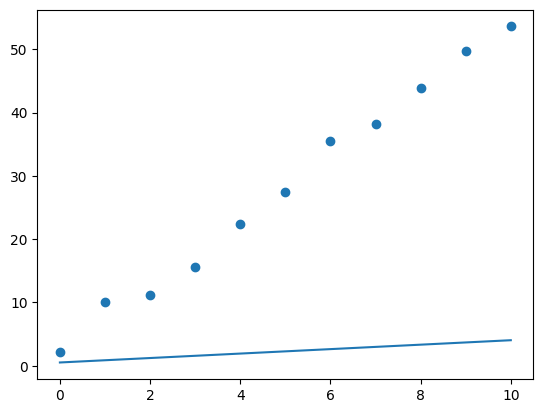

907.2368109691928


In [4]:
# After just instantiating the model with random parameters, we do not expect it to be accurate yet.
linearmodel = LinearModel()
plt.scatter(x_train, y_train)
plt.plot(linearmodel(x_train))
plt.show()
print(MSE(linearmodel(x_train), y_train)) # high loss

In [5]:
linearmodel_losses = [] # to plot the loss as we train and we can watch it decline as we iterate

for i in range(500):
    # training loop
    
    # pull a random datapoint index
    index = np.random.randint(0, len(x_train))
    
    # pull the datapoint, and predict the value with the model
    sample = x_train[index] # sample = x input
    label = y_train[index] # label = known target y output
    prediction = linearmodel(sample) # prediction = model output for x input
    
    # increment the parameters toward a lower loss.
    linearmodel.step_m(lr, prediction, label, sample)
    linearmodel.step_b(lr, prediction, label)
    
    # log the loss for plotting later.
    L = MSE(prediction, label)
    linearmodel_losses.append(L)

Loss: 1.866659379740362, m : 5.188745795398192, b: 2.082185168523195


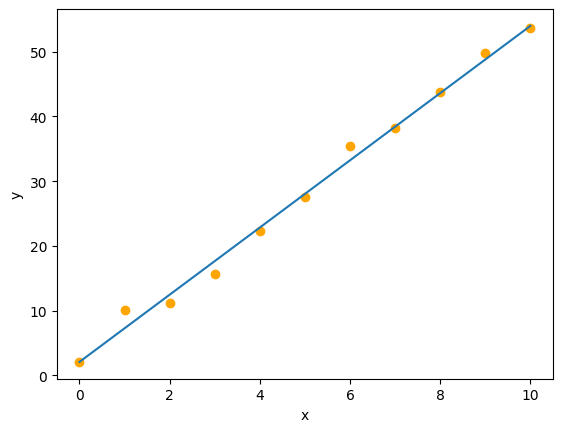

In [6]:
# Visualize model fit and view our parameters
y = linearmodel(x_train)
print(f"Loss: {MSE(y, y_train)}, m : {linearmodel.m}, b: {linearmodel.b}")
plt.scatter(x_train, y_train, c='orange')
plt.plot(y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

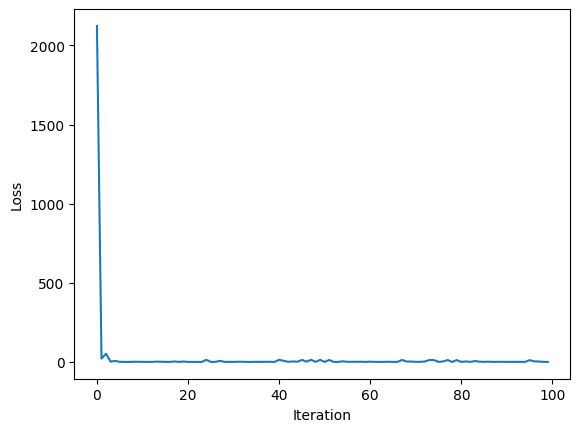

In [21]:
# Visualize decline of loss function over iterations, play around with the slicing for scale
plt.plot(linearmodel_losses[0:100])#[0:400], )#[0:20])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [8]:
# Let's now move on and do a non-linear regression!! For example, a parabola, let's fit a curve to some fake trajectory path.

class ParabolaModel():
    
    def __init__(self):
        self.a = np.random.rand()
        self.b = np.random.rand()
        self.c = np.random.rand()
        
    def __call__(self, x):
        return self.a * x**2 + self.b * x + self.c

    def _dLda(self, y, y_hat, x):
        # negative partial derivative of loss with respect to a
        return 2*(y_hat-y) * x**2 # dyda is x**2

    def _dLdb(self, y, y_hat, x):
        # negative partial derivative of loss with respect to b
        return 2*(y_hat-y) * x # dydg is just x

    def _dLdc(self, y, y_hat):
        # negative partial derivative of loss with respect to b
        return 2*(y_hat-y) # dydc is just 1

    def step_a(self, lr, y, y_hat, x):
        # step in the negative gradient direction, on the a axis
        self.a += self._dLda(y, y_hat, x) * lr

    def step_b(self, lr, y, y_hat, x):
        # step in the negative gradient direction, on the g axis
        self.b += self._dLdb(y, y_hat, x) * lr

    def step_c(self, lr, y, y_hat):
        # step in the negative gradient direction, on the c axis
        self.c += self._dLdc(y, y_hat) * lr

In [9]:
def _y_hat(t):
    #return - (t-3)**2 + 5 # not allowed to (t-3) unless your model also has a (x- h)**2 for example to learn
    return - (t)**2 + 15 

x_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = _y_hat(x_train) + np.random.rand(len(x_train))*5 -2.5 # add some noise to the data

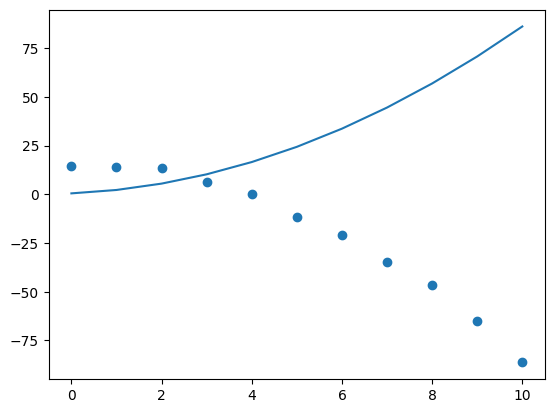

In [10]:
# Again, after just instantiating the model with random parameters, we do not expect it to be accurate yet!!
parabolamodel = ParabolaModel()
plt.scatter(x_train, y_train)
plt.plot(parabolamodel(x_train))
plt.show()

In [11]:
parabolalosses = []
lr = 0.0001 # this model needs a lower learning rate than the others for some reason

for i in range(50000):
    # training loop
    
    # pull a random datapoint index
    index = np.random.randint(0, len(x_train))
    
    # pull the datapoint, and predict the value with the model
    sample = x_train[index] # sample = x input
    label = y_train[index] # label = known target y output
    prediction = parabolamodel(sample) # prediction = model output for x input
    
    # increment the parameters toward a lower loss.
    parabolamodel.step_a(lr, prediction, label, sample)
    parabolamodel.step_b(lr, prediction, label, sample)
    parabolamodel.step_c(lr, prediction, label)
    
    # log the loss for plotting later.
    L = MSE(prediction, label)
    parabolalosses.append(L)

Loss: 5.3627025821404795, a, b, c : -1.1617802009510125, 1.5411866020254636, 11.702955124038192


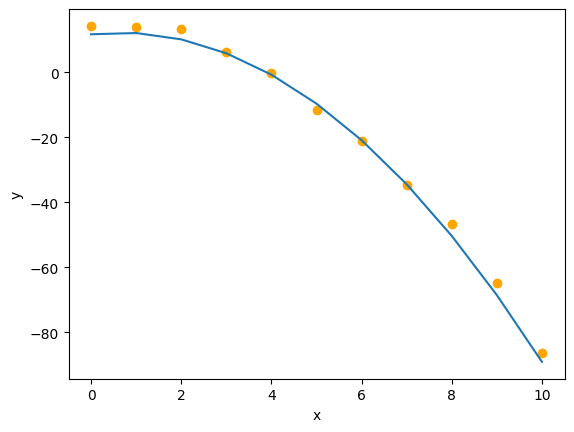

In [12]:
y = parabolamodel(x_train)
print(f"Loss: {MSE(y, y_train)}, a, b, c : {parabolamodel.a}, {parabolamodel.b}, {parabolamodel.c}")
plt.scatter(x_train, y_train, c='orange')
plt.plot(y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

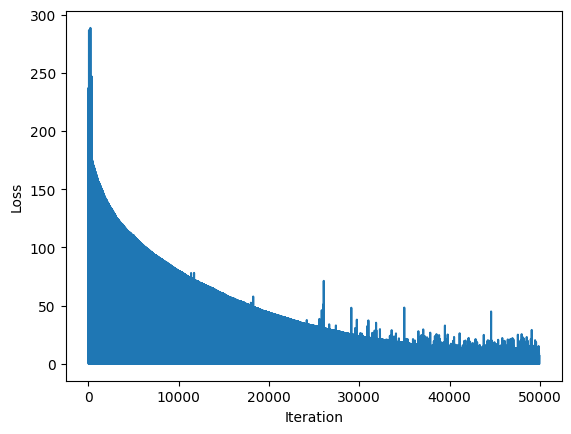

In [13]:
plt.plot(parabolalosses[100:])#[0:400], )#[0:20]) # again play with slicing to see different levels of magnification etc
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [22]:
class LayeredModel():
    
    def __init__(self):
        self.b1 = np.random.rand()
        self.b2 = np.random.rand()
        self.w1 = np.random.rand()
        self.w2 = np.random.rand()
        
    def __call__(self, x):
        return self.b1 + self.w1 * self._sigmoid(self._z(x))
    
    def step_b1(self, lr, y, y_hat):
        self.b1 += 2 * (y_hat - y) * lr # step down grad w/r to b1, dLdb1 = dLdy
        
    def step_w1(self, lr, y, y_hat, x):
        self.w1 += 2 * (y_hat - y) * lr * self._sigmoid(self._z(x)) # step down grad w/r to w1, dLdw1 = dLdy dydw1
        
    def step_b2(self, lr, y, y_hat, x):
        self.b2 += 2 * (y_hat - y) * lr * self.w1 * self._d_sigmoid(self._z(x))
        
    def step_w2(self, lr, y, y_hat, x):
        self.w2 += 2 * (y_hat - y) * lr * self.w1 * self._d_sigmoid(self._z(x)) * x
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _d_sigmoid(self, z):
        return self._sigmoid(z) * (1 - self._sigmoid(z))
    
    def _z(self, x):
        return self.w2 * x + self.b2

In [23]:
def _y_hat(t): # step func with scale factor 5
    t = t > 4
    t = np.array(t, dtype='int')
    return t * 5

x_train = np.arange(-10, 10)
y_train = _y_hat(x_train) #+ np.random.rand(len(x_train))*5 -2.5 # add some noise to the data

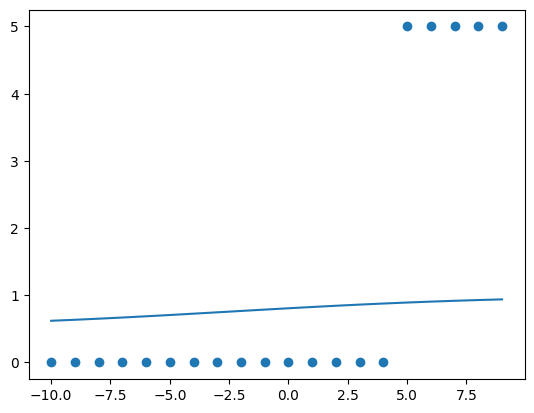

In [24]:
# Initialized state of the model, untrained
stepmodel = LayeredModel()
plt.scatter(x_train, y_train)
plt.plot(x_train, stepmodel(x_train))
plt.show()

In [25]:
steplosses = []
lr = 0.001 # learning rate, step-size proportion, using a higher learning rate again here so the step function moves faster

for i in range(100000):
    # training loop
    
    # pull a random datapoint index
    index = np.random.randint(0, len(x_train))
    
    # pull the datapoint, and predict the value with the model
    sample = x_train[index] # sample = x input
    label = y_train[index] # label = known target y output
    prediction = stepmodel(sample) # prediction = model output for x input
    
    # increment the parameters toward a lower loss.
    stepmodel.step_b1(lr, prediction, label)
    stepmodel.step_w1(lr, prediction, label, sample)
    stepmodel.step_b2(lr, prediction, label, sample)
    stepmodel.step_w2(lr, prediction, label, sample)
    
    # log the loss for plotting later.
    L = MSE(prediction, label)
    steplosses.append(L)

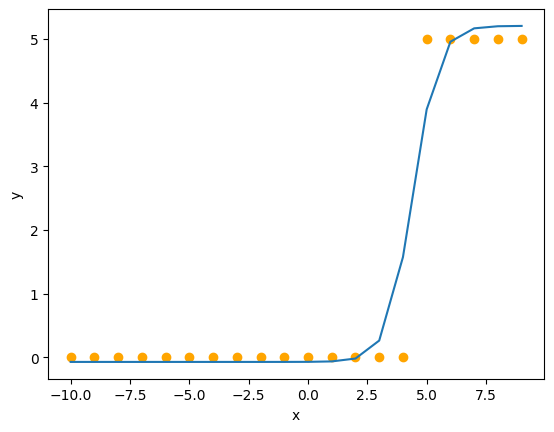

In [26]:
y = stepmodel(x_train)
#print(f"Loss: {MSE(y, y_train)}, a, b, c : {stepmodel.a}, {stepmodel.b}, {parabolamodel.c}")
plt.scatter(x_train, y_train, c='orange')
plt.plot(x_train, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

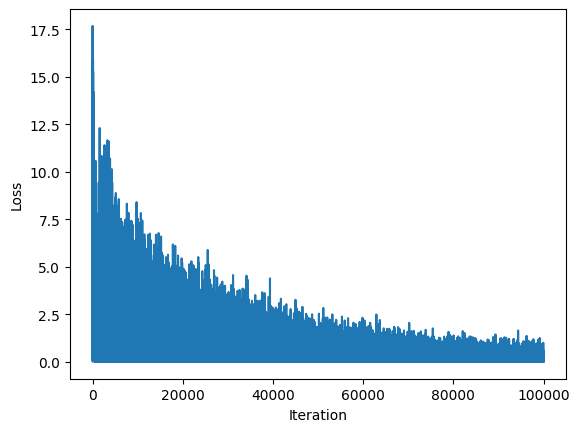

In [19]:
plt.plot(steplosses[10:])#[0:400], )#[0:20]) # again play with slicing to see different levels of magnification etc
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [20]:
# The next big step is to vectorize/generalize that simple feedforward model, to have multiple neurons per layer,
# and to have multiple layers in the model than just the 1 hidden layer.!!!!